In [31]:
from tesswcs.locate import check_observability
from tess_ephem.ephem import _get_horizons_ephem
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [8]:
datetime.datetime.today().strftime("%Y-%m-%d")

'2025-07-29'

In [70]:
tstart = Time(datetime.datetime.today().strftime("%Y-%m-%d"), scale="utc", format="iso")
tstop = tstart + 365 * u.d
tstop

<Time object: scale='utc' format='iso' value=2026-07-29 00:00:00.000>

In [62]:
ephem = _get_horizons_ephem("C/2025 N1", start=tstart, stop=tstop, step="6H")

In [63]:
ephem

targetname,datetime_str,datetime_jd,M1,solar_presence,k1,interfering_body,RA,DEC,RA_rate,DEC_rate,Tmag,Nmag,r,r_rate,delta,delta_rate,TDB-UT,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,arcsec / h,arcsec / h,mag,mag,AU,km / s,AU,km / s,s,deg,deg,deg
str17,str17,float64,float64,str1,float64,str1,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
ATLAS (C/2025 N1),2025-Jul-29 00:00,2460885.5,12.3,,4.5,,254.93217,-17.70128,-98.2363,11.02787,17.075,--,3.58996509623,-56.4764404,2.85439674738549,-26.9329621,69.183371,12.594,261.9051,4.4986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATLAS (C/2025 N1),2026-Jul-29 00:00,2461250.5,12.3,,4.5,,107.32473,19.75015,7.335695,-1.21905,21.86,--,9.655207797932,58.780416,10.6075621061076,49.5553825,69.183366,1.9945,105.3057,-2.8483


In [79]:
ephem["RA"]

254.93217
254.76024
254.58822
254.41613
...
107.29885
107.31177
107.32473


In [65]:
coords = SkyCoord(ephem["RA"], ephem["DEC"])

In [83]:
coords.ra.hour

array([16.995478  , 16.984016  , 16.972548  , ...,  7.15325667,
        7.154118  ,  7.154982  ])

array([-17.70128, -17.68288, -17.66446, ...,  19.75421,  19.75218,
        19.75015])

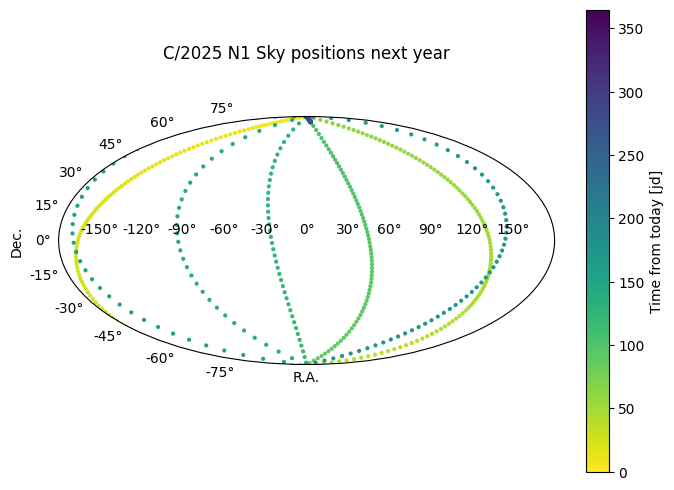

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="aitoff")
ax.set_title("C/2025 N1 Sky positions next year", y=1.2)
bar = ax.scatter(coords.ra.hour, coords.dec.deg, c=ephem["datetime_jd"]-ephem["datetime_jd"][0], s=4, cmap="viridis_r")
plt.colorbar(bar, label="Time from today [jd]", ax=ax)
ax.set_xlabel("R.A.")
ax.set_ylabel("Dec.")
plt.show()

In [66]:
tess_obs = check_observability(coords).to_pandas()

Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This function will return the predicted WCS for Sector 95.
Data for Sector 95 has not been archived yet. This func

In [68]:
tess_obs.Sector.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107])

In [69]:
tess_obs[np.any(tess_obs.iloc[:, 3:].values, axis=1) & (tess_obs.Sector.values > 92)]

,Sector,Camera,CCD,targ_0001,targ_0002,targ_0003,targ_0004,targ_0005,targ_0006,targ_0007,...,targ_1452,targ_1453,targ_1454,targ_1455,targ_1456,targ_1457,targ_1458,targ_1459,targ_1460,targ_1461
